In [54]:
import glob,os,sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
from numpy import *
import re
import scipy.stats as st
from os.path import expanduser
import cmath
import scipy.optimize as op
import time
import gzip
import pandas as pd
%matplotlib inline

In [55]:
def med_med (true,fitted):
    temp = fitted - true
    return (np.median(np.abs(temp-np.median(temp))))

def rms (true,fitted):
    temp = fitted - true
    return np.sqrt((np.sum(temp**2))/len(temp))

def mag(u0):
    return (2+u0**2)/(u0*(np.sqrt(4+u0**2)))
    
start = time.time()

home = os.path.expanduser("~")

direc = os.listdir(".")

In [62]:
name = 'alllc_full_info_w_smoothing.CSV'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
df = pd.read_csv(tempdata)
df_org = df


df['u0_true'] = np.abs(df['u0_true'])
df['u0_fitted'] = np.abs(df['u0_fitted'])

In [63]:
red_chi_2_1 = np.abs(2*df['chi_2_1'])#/38316
red_chi_2_2 = np.abs(2*df['chi_2_2'])#/38316


In [64]:
name = 'double-peaked.csv'  
#Library/Mobile Documents/com~apple~CloudDocs/Microlensing/OSU trip/Matt/result_file/
tempdata2 = home+'/Desktop/trial_runs/'+str(name)
#&((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.5) & (df['u0_true']>0.1)
dd = pd.read_csv(tempdata2)

In [65]:
df_new_test = df
df = df.reset_index()
for i in range(len(df)):
    if df['name'][i] in np.asarray(dd['name']):
        #print i
        df = df.drop([i], axis=0)
print 'done'

done


In [ ]:
df = df[((red_chi_2_1-red_chi_2_2)<40)|(df['s_fitted']>5)]
df = df[((df['s_fitted']<1.03)&(df['s_fitted']>0.9))]

In [60]:
len(df)

12314

In [61]:
print len(df)
#df = df[ (df['chi_2_2']>-25000) & (df['s_fitted']<5) & ((df['f_s_true']*( (2 + df['u0_true']**2) / (df['u0_true']*np.sqrt(4 + df['u0_true']**2)) ) + (1-df['f_s_true']) )>1.1)]
#df = df[(np.abs(df['t0_fitted']-df['tp_fitted'])>1) & ((-2*df['chi_2_2']/41039)>1.003) ]
df['q_fitted_log'][df['q_fitted_log']>0] = np.log10( 1/df['q_fitted'][df['q_fitted_log']>0] )
df['q_fitted'][df['q_fitted_log']>0] = ( 1/df['q_fitted'][df['q_fitted_log']>0] )

df = df[((red_chi_2_1-red_chi_2_2)>40)]
print (len(df))



12314
9309


/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [33]:
#df = df[np.abs(df['u0_fitted'])>0.045] #02/20/2018
df = df[df['s_fitted']<5]
print(len(df))

8851


In [34]:
df = df[(df['s_fitted']>1.03)|(df['s_fitted']<0.97)] #03/25/2019
print(len(df))

7355


(0.1, 10)

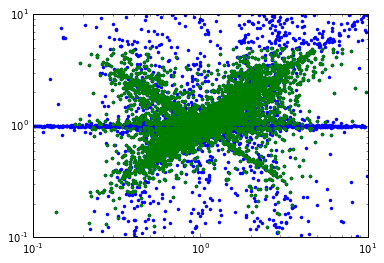

In [35]:
%matplotlib qt
plt.loglog(df_org['s_true'],df_org['s_fitted'],'b.')
plt.loglog(df['s_true'],df['s_fitted'],'g.')
plt.xlim(0.1,10)
plt.ylim(0.1,10)

In [36]:
temp_list = []
for i in range (len(df_org)):
    if df_org['ampl_fitted'][i]>0:
        if ((df_org['s_true_log'][i]* df_org['s_fitted_log'][i])<0) & (df_org['s_fitted'][i]>df_org['s_true'][i]+0.5):
            #print i
            temp_list.append (1.0/df_org['s_fitted'][i])
        else:
            temp_list.append (df_org['s_fitted'][i])
        
    elif df_org['ampl_fitted'][i]<0:
        if ((df_org['s_true_log'][i]* df_org['s_fitted_log'][i])<0) & (df_org['s_fitted'][i]<df_org['s_true'][i]-0.5):
            #print i
            temp_list.append (1.0/df_org['s_fitted'][i])
        else:
            temp_list.append (df_org['s_fitted'][i])
    else:
        temp_list.append (df_org['s_fitted'][i])
print 'done'            

done


In [37]:
len(temp_list)

13010

In [38]:
df_org['s_fitted_modified'] = temp_list

(0, 5)

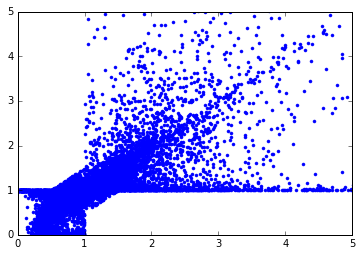

In [39]:
x = df_org[((df_org['s_true_log']* df_org['s_fitted_log'])<0)]
plt.plot(df_org['s_true'],df_org['s_fitted_modified'],'b.')
# plt.plot(df_org['s_true'][((df_org['s_true_log']* df_org['s_fitted_log'])<0)][df_org['s_fitted']<df_org['s_true']+0.6][df_org['s_true']<1],
#          df_org['s_fitted_modified'][((df_org['s_true_log']* df_org['s_fitted_log'])<0)][df_org['s_fitted']<df_org['s_true']+0.6][df_org['s_true']<1],'r.')
# plt.plot(df_org['s_true'][df_org['s_fitted']>df_org['s_true']+0.6],
#          df_org['s_fitted_modified'][df_org['s_fitted']>df_org['s_true']+0.6],'g.')
plt.xlim(0,5)
plt.ylim(0,5)

In [40]:
len(df_org)

13010

(0, 5)

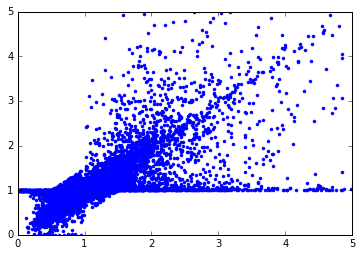

In [41]:
plt.plot(df_org['s_true'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >40],df_org['s_fitted_modified'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >40],'b.')
plt.xlim(0,5)
plt.ylim(0,5)

(0, 5)

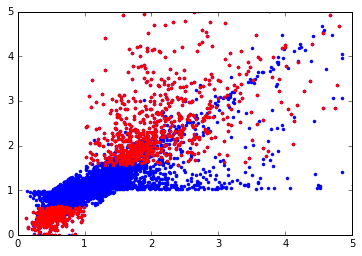

In [42]:
plt.plot(df_org['s_true'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045],
         df_org['s_fitted_modified'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045],'b.')
plt.plot(df_org['s_true'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][mag(df_org['u0_fitted'])<1.4],
         df_org['s_fitted_modified'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][mag(df_org['u0_fitted'])<1.4],'r.')


plt.xlim(0,5)
plt.ylim(0,5)

In [43]:
print med_med(df_org['s_true'],df_org['s_fitted_modified'])
print med_med(df_org['s_true'],df_org['s_fitted'])

0.1857388307497474
0.24671560922800018


In [44]:
print med_med(df_org['s_true'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][df_org['s_fitted']<5],
              df_org['s_fitted_modified'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][df_org['s_fitted']<5])
print med_med(df_org['s_true'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][df_org['s_fitted']<5],
              df_org['s_fitted'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][df_org['s_fitted']<5])

0.10183736512899993
0.1318114712500002


In [45]:
len(df_org['s_true'][2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >70][df_org['u0_fitted']>0.045][df_org['s_fitted']<5])

6456

In [46]:
df_org['tEp_true_2'] = df_org['tE_true']*np.sqrt(df_org['q_true'] + (df_org['rho']**2))
df_org['tEp_fitted_2'] = df_org['tEp_fitted']

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


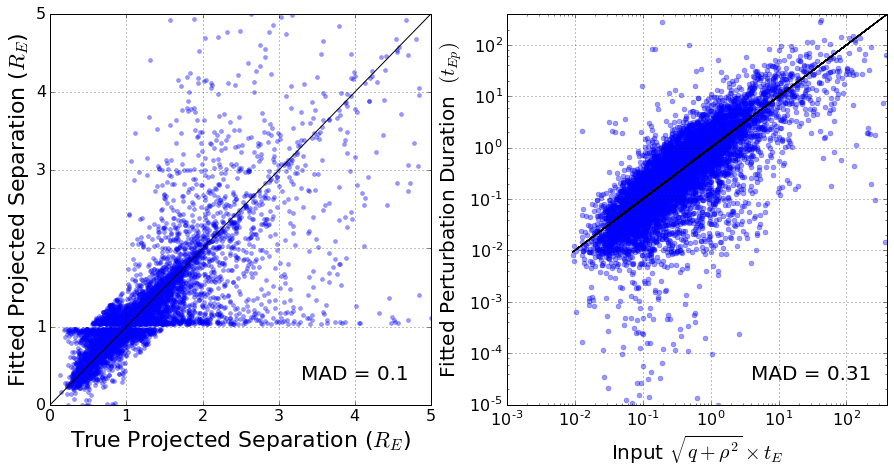

In [47]:
MAD_x = 0.8
MAD_y = 0.08
plt.close()

df = df_org[2*np.abs(df_org['chi_2_1']-df_org['chi_2_2']) >40][df_org['s_fitted']<5]
df = df[(df['s_fitted']>1.03)|(df['s_fitted']<0.97)]

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)

#axarr[0].set_title('Projected Separation' ,size=26)

axarr[0].plot (df['s_true'],df['s_fitted_modified'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[0].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)

axarr[0].plot ((0,5),(0,5),'k-',label='_nolegend_')
axarr[0].set_xlim((0,5))
axarr[0].set_ylim((0,5))
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(df['s_true'],df['s_fitted_modified']),2)), size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)
axarr[0].set_xlabel('True Projected Separation ($R_E$)',size=22)
axarr[0].set_ylabel('Fitted Projected Separation ($R_E$)',size=22)
axarr[0].grid()


#axarr[1].set_title('Mass Ratio ',size=26)
axarr[1].loglog (df['tEp_true_2'],df['tEp_fitted'],'b.',markersize=10,label='_nolegend_',alpha=0.4)
#axarr[1].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[1].loglog (df['tEp_true_2'],df['tEp_true_2'],'k-',label='_nolegend_')
axarr[1].set_xlim((10**-3,400))
axarr[1].set_ylim(( 10**-5,400))
plt.text(MAD_x, MAD_y, 'MAD = '+str(round(med_med(np.log10(np.abs(df['tEp_true_2'])),np.log10(np.abs(df['tEp_fitted']))),2)), size = 20
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)

axarr[1].set_xlabel( 'Input '+r'$\sqrt{q+{\rho}^2}\times t_E$',size=20)
axarr[1].set_ylabel('Fitted Perturbation Duration '+ r' $(t_{Ep})$',size=20)
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[1].grid()





f.set_size_inches(15.0,7)
f.savefig(home+'/Desktop/result_q_s_modified_s.png')

In [48]:
df['tE_ratio'] = np.abs(df['tEp_fitted']/df['tE_fitted'])**2

In [49]:
df['q_true_new'] = df['q_true'] + (df['rho']**2)

In [50]:
from scipy import stats


bin_means, bin_edges, binnumber = stats.binned_statistic(df['q_true_new'],
                 df['tE_ratio'], statistic='median', bins=np.logspace(-6,-1,10))

In [51]:
round(1.48*med_med(np.log10(np.abs(df['s_true'])),np.log10(np.abs(df['s_fitted_modified']))),2)

0.07

/Users/Research/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


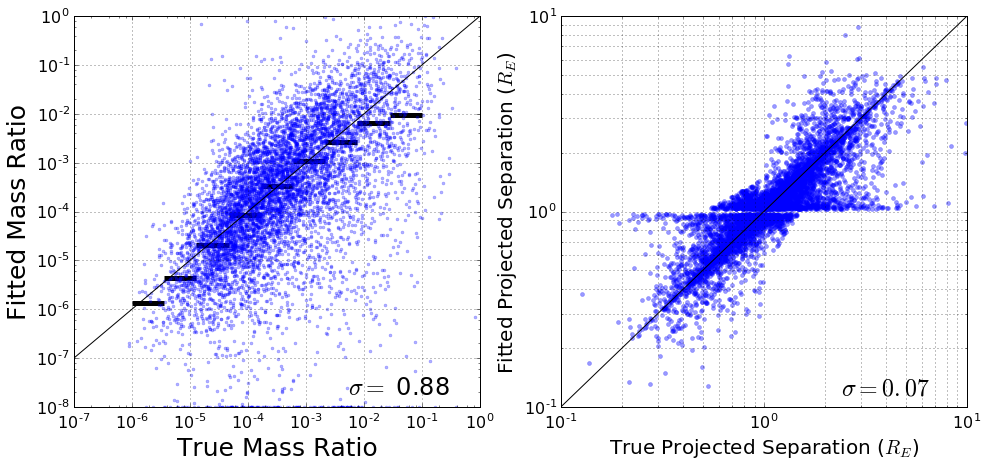

In [52]:
%matplotlib inline
MAD_x = 0.8
MAD_y = 0.08
plt.close()

tE_ratio = df['tE_ratio']
tE_ratio[tE_ratio<1e-8] = 1e-8

f, axarr = plt.subplots(1, 2)
#f.suptitle('Plots of Fitted physical parameters "q" and "s" Versus True parameters for '+str(len(df))+' targets',size=20)


#axarr[0].set_title('Mass Ratio ',size=26)
axarr[0].loglog (df['q_true_new'],tE_ratio,'b.',markersize=6
                 ,label='_nolegend_',alpha=0.3)
# axarr[0].loglog (df['tEp_true_2'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
#                  df['tEp_fitted'][(df['tEp_fitted']>df['tEp_true_2']*8) & (df['tEp_fitted']<df['tEp_true_2']*8)],
#                  'r.', markersize=10,label='_nolegend_',alpha=0.4)


#axarr[0].plot (df['q_true_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['q_fitted_log'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',markersize=10,label='_nolegend_',alpha=0.4)

axarr[0].loglog ((10**-11,1.0),( 10**-11,1.0),'k-',label='_nolegend_')


axarr[0].hlines(bin_means, bin_edges[:-1], bin_edges[1:], colors='k', lw=5)
           #label='binned statistic of data')

axarr[0].set_xlim((10**-7,1.0))
axarr[0].set_ylim(( 10**-8,1.0))
plt.text(MAD_x, MAD_y-0.03, r'${\bf \sigma =}$ '+str(round(1.48*med_med(np.log10(np.abs(df['q_true_new'])),np.log10(np.abs(df['tE_ratio']))),2)-0.03), size = 24
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[0].transAxes)

# axarr[0].set_xlabel( 'Input '+r'$(q+{\rho}^2)$',size=25)
# axarr[0].set_ylabel( r' ${(t_{Ep}/t_E)}^2$',size=25)
axarr[0].set_xlabel( 'True Mass Ratio',size=25)
axarr[0].set_ylabel( 'Fitted Mass Ratio',size=25)
axarr[0].tick_params(axis='x',labelsize=16)
axarr[0].tick_params(axis='y',labelsize=16)
#plt.legend()
axarr[0].grid()




#axarr[1].set_title('Projected Separation' ,size=26)

axarr[1].loglog (df['s_true'],df['s_fitted_modified'],'b.',label='_nolegend_',markersize=8 , alpha = 0.4)
#axarr[1].plot (df['s_true'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],df['s_fitted'][(df['ampl_fitted']>0.5)|(df['ampl_fitted']<-0.5)],'r.',label='_nolegend_',markersize=8 , alpha = 0.4)
#
axarr[1].loglog ((0.1,10),(0.1,10),'k-',label='_nolegend_')
axarr[1].set_xlim((0.1,10))
axarr[1].set_ylim((0.1,10))
axarr[1].tick_params(axis='x',labelsize=16)
axarr[1].tick_params(axis='y',labelsize=16)
#plt.legend()
plt.text(MAD_x, MAD_y-0.03, '$\sigma = 0.07$ ', size = 24
        ,horizontalalignment='center', verticalalignment='center', transform = axarr[1].transAxes)

#+str(round(1.48*med_med(np.log10(np.abs(df['s_true'])),np.log10(np.abs(df['s_fitted_modified']))),2))
axarr[1].set_xlabel('True Projected Separation ($R_E$)',size=20)
axarr[1].set_ylabel('Fitted Projected Separation ($R_E$)',size=20)
axarr[1].grid(b=True, which='minor')
axarr[1].grid(b=True, which='major')









f.set_size_inches(16,7)
f.savefig(home+'/Desktop/result_q_s_after_smoothing_modified_s.png')

In [113]:
df = df_org
# Absolute deviation from median for regin s_true>1 and s_fitted>1
x1 = np.abs((np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])) - 
           np.median(np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']>1)])-np.log10(df['s_fitted'][(df['s_true']>1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted>1
x2 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']>1)])-np.log10(1.0/df['s_fitted'][(df['s_true']<1)&(df['s_fitted']>1)])))

# Absolute deviation from median for regin s_true>1 and s_fitted<1
x3 = np.abs( (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']>1)&(df['s_fitted']<1)])-np.log10(1.0/df['s_fitted'][(df['s_true']>1)&(df['s_fitted']<1)])))

# Absolute deviation from median for regin s_true<1 and s_fitted<1
x4 = np.abs( (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])) - 
            np.median (np.log10(df['s_true'][(df['s_true']<1)&(df['s_fitted']<1)])-np.log10(df['s_fitted'][(df['s_true']<1)&(df['s_fitted']<1)])))

# Merging all above lists. a is absolute deviation from median for all targets with respect to their own distributions
frames1 = [x1,x4]
frames2 = [x2,x3]
frames3 = [x1,x2,x3,x4]
a_one_one = np.median(pd.concat(frames1))
a_curve = np.median(pd.concat(frames2))
a_total = np.median(pd.concat(frames3))